<a href="https://colab.research.google.com/github/ayush100497/ayush100497/blob/main/Copy_of_Assignment_Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 dataset = pd.read_csv('/content/drive/MyDrive/Linear regression/housing.csv')

In [ ]:
dataset

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [ ]:
import re
dataset.rename(columns={' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00': 'MEDV'}, inplace=True)
dataset
string = ' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'
dataset['MEDV'].str.strip()
dataset['MEDV']
# string split and assigning columns
dataset[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','BLACKS_PROP','LSTAT','MEDV']] = dataset.MEDV.str.split(expand=True)
dataset

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACKS_PROP,LSTAT
0,21.60,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14
1,34.70,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03
2,33.40,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94
3,36.20,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33
4,28.70,0.02985,0.00,2.180,0,0.4580,6.4300,58.70,6.0622,3,222.0,18.70,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,22.40,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67
501,20.60,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08
502,23.90,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64
503,22.00,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48


In [ ]:
#converting whole dataset to integer or float
dataset = dataset.apply(pd.to_numeric)
#check for null values if any
dataset.isnull().sum()

MEDV           0
CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
BLACKS_PROP    0
LSTAT          0
dtype: int64

In [ ]:
X = dataset[['MEDV']]
# y = dataset['CRIM']
# y = dataset.drop('MEDV', axis =1)
X

,MEDV
0,21.6
1,34.7
2,33.4
3,36.2
4,28.7
...,...
500,22.4
501,20.6
502,23.9
503,22.0


In [ ]:

# sns.set(rc={'figure.figsize':(12, 8)})
# g = sns.PairGrid(dataset, vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','BLACKS_PROP','LSTAT','MEDV'], height=1.5, aspect=1.5)
# g = g.map_diag(plt.hist)
# g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
#                 line_kws={'color':'red', 'linewidth': 2})
# g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
# plt.show()

In [ ]:
# high_corr = dataset[['ZN','RM','CHAS','BLACKS_PROP']]
# #DIS and ZN are highly correlated so we will remove one of them to remove multi collinearity
# multi_col = dataset[['ZN','RM','CHAS','DIS','BLACKS_PROP']]
# low_corr = dataset.drop(['ZN','RM','CHAS','DIS','BLACKS_PROP'], axis=1)

# Y = dataset[['LSTAT', 'RM', 'CRIM', 'NOX']]

# A = dataset['CRIM'].values
# B = dataset['INDUS'].values
# C = dataset['NOX'].values
# D = dataset['RM'].values
# E = dataset['AGE'].values
# F = dataset['DIS'].values
# G = dataset['RAD'].values
# H = dataset['TAX'].values
# I = dataset['PTRATIO'].values
# J = dataset['BLACKS_PROP'].values
# K = dataset['LSTAT'].values
# #Independent variable
# Y = dataset['MEDV'].values

dataset.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACKS_PROP,LSTAT
MEDV,1.000000,-0.388249,0.360393,-0.484126,0.175364,-0.427295,0.695365,-0.376932,0.249896,-0.381690,-0.468543,-0.508411,0.333394,-0.738187
CRIM,-0.388249,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329
ZN,0.360393,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894
INDUS,-0.484126,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737
CHAS,0.175364,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576
NOX,-0.427295,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262
RM,0.695365,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734
AGE,-0.376932,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782
DIS,0.249896,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277
RAD,-0.381690,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608


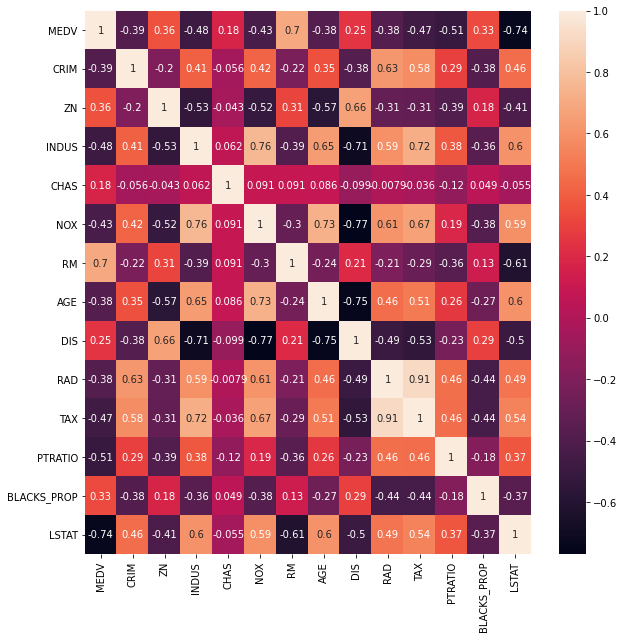

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
#remove RAD,TAX,DIS,INDUS,NOX,AGE


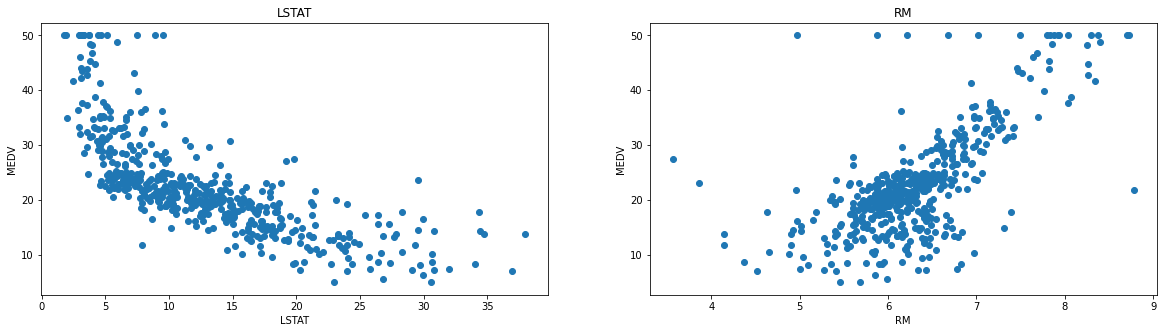

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = dataset['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


#Only LSTAT and RM, High correlation with MEDV



 Polynomial degree =  1
The model performance for the training set
-------------------------------------------
RMSE of training set is 5.742168977550195
R2 score of training set is 0.6378494716421765


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.616389821591518
R2 score of test set is 0.6226095344053366


 Polynomial degree =  2
The model performance for the training set
-------------------------------------------
RMSE of training set is 4.780080653578728
R2 score of training set is 0.7490381917074231


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.3654613464581242
R2 score of test set is 0.7994257448387364


 Polynomial degree =  3
The model performance for the training set
-------------------------------------------
RMSE of training set is 4.642032789801251
R2 score of training set is 0.7633243416985511


The model performance for the test set
--------------------

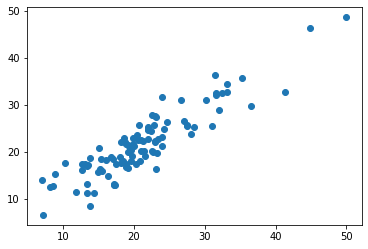

In [ ]:
X = dataset[['LSTAT','RM']]
Y = dataset['MEDV']
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

def create_polynomial_regression_model(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

def create_polynomial_regression_model_plot(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  plt.scatter(Y_test, y_test_predict)
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(1)
create_polynomial_regression_model(2)
create_polynomial_regression_model(3)
create_polynomial_regression_model(4)
create_polynomial_regression_model(5)
create_polynomial_regression_model(6)
create_polynomial_regression_model(7)
create_polynomial_regression_model(8)
create_polynomial_regression_model(9)
create_polynomial_regression_model(10)
create_polynomial_regression_model_plot(3)

3 is best in case of Lstat and RM


#Remove RAD,TAX,DIS,INDUS,NOX,AGE, as they re having high correltion with independent variables



 Polynomial degree =  1
The model performance for the training set
-------------------------------------------
RMSE of training set is 7.909126074963801
R2 score of training set is 0.3129407626861247


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.038380725485597
R2 score of test set is 0.3543056908316877


 Polynomial degree =  2
The model performance for the training set
-------------------------------------------
RMSE of training set is 6.970636978648492
R2 score of training set is 0.4663185375060429


The model performance for the test set
-------------------------------------------
RMSE of test set is 6.1196088020465975
R2 score of test set is 0.33681713657267254


 Polynomial degree =  3
The model performance for the training set
-------------------------------------------
RMSE of training set is 7.133844263953277
R2 score of training set is 0.4410352324481548


The model performance for the test set
-------------------

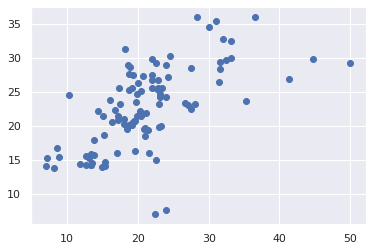

In [ ]:
X = dataset[['RAD','TAX','DIS','INDUS','NOX','AGE']]
Y = dataset['MEDV']
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

def create_polynomial_regression_model(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

def create_polynomial_regression_model_plot(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  plt.scatter(Y_test, y_test_predict)
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(1)
create_polynomial_regression_model(2)
create_polynomial_regression_model(3)
create_polynomial_regression_model(4)
create_polynomial_regression_model(5)
create_polynomial_regression_model(6)
create_polynomial_regression_model(7)
create_polynomial_regression_model(8)
create_polynomial_regression_model(9)
create_polynomial_regression_model(10)
create_polynomial_regression_model_plot(2)

# In these highlly correlated variables we have degree 2 as the best



 Polynomial degree =  1
The model performance for the training set
-------------------------------------------
RMSE of training set is 5.279302687452605
R2 score of training set is 0.693880981762264


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.62985654835923
R2 score of test set is 0.620404509575904


 Polynomial degree =  2
The model performance for the training set
-------------------------------------------
RMSE of training set is 3.971183071982922
R2 score of training set is 0.8267883881291745


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.362023407834468
R2 score of test set is 0.7998353230223607


 Polynomial degree =  3
The model performance for the training set
-------------------------------------------
RMSE of training set is 3.5565280023681747
R2 score of training set is 0.8610720424396896


The model performance for the test set
-----------------------

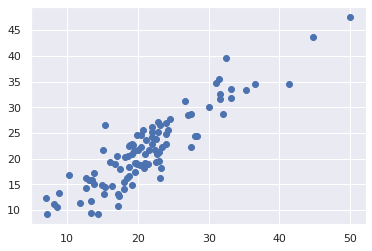

In [ ]:
X = dataset[['LSTAT','RM','PTRATIO','CHAS','ZN']]
Y = dataset['MEDV']
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

def create_polynomial_regression_model(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

def create_polynomial_regression_model_plot(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  plt.scatter(Y_test, y_test_predict)
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(1)
create_polynomial_regression_model(2)
create_polynomial_regression_model(3)
create_polynomial_regression_model(4)
create_polynomial_regression_model(5)
create_polynomial_regression_model(6)
create_polynomial_regression_model(7)
create_polynomial_regression_model(8)
create_polynomial_regression_model(9)
create_polynomial_regression_model(10)
create_polynomial_regression_model_plot(2)

# This is a bad model



 Polynomial degree =  1
The model performance for the training set
-------------------------------------------
RMSE of training set is 5.386481681430843
R2 score of training set is 0.6813253184413657


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.511115471825208
R2 score of test set is 0.6396256581611648


 Polynomial degree =  2
The model performance for the training set
-------------------------------------------
RMSE of training set is 4.346345107337677
R2 score of training set is 0.7925155278601569


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.2671671435144654
R2 score of test set is 0.8109708940924586


 Polynomial degree =  3
The model performance for the training set
-------------------------------------------
RMSE of training set is 4.167456732195062
R2 score of training set is 0.8092434825356716


The model performance for the test set
--------------------

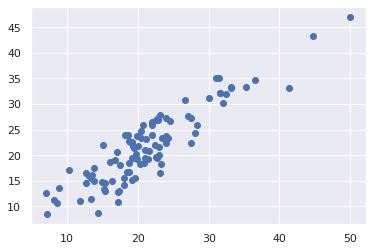

In [ ]:
X = dataset[['LSTAT','RM','PTRATIO']]
Y = dataset['MEDV']
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

def create_polynomial_regression_model(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

def create_polynomial_regression_model_plot(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  plt.scatter(Y_test, y_test_predict)
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(1)
create_polynomial_regression_model(2)
create_polynomial_regression_model(3)
create_polynomial_regression_model(4)
create_polynomial_regression_model(5)
create_polynomial_regression_model(6)
create_polynomial_regression_model(7)
create_polynomial_regression_model(8)
create_polynomial_regression_model(9)
create_polynomial_regression_model(10)
create_polynomial_regression_model_plot(2)

#This model is slightly better with degree 2 

Degree 3 fits the best

In [ ]:
Y = dataset['MEDV'].values
X = dataset['LSTAT'].values
X=X.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

def create_polynomial_regression_model(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

def create_polynomial_regression_model_plot(degree):
    
  "Creates a polynomial regression model for the given degree"    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  print('\n\n Polynomial degree = ', degree)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("\n")
  plt.scatter(Y_test, y_test_predict)
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(1)
create_polynomial_regression_model(2)
create_polynomial_regression_model(3)
create_polynomial_regression_model(4)
create_polynomial_regression_model(5)
create_polynomial_regression_model(6)
create_polynomial_regression_model(7)
create_polynomial_regression_model(8)
create_polynomial_regression_model(9)
create_polynomial_regression_model(10)




 Polynomial degree =  1
The model performance for the training set
-------------------------------------------
RMSE of training set is 6.359747160874321
R2 score of training set is 0.5557607919017009


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.603922693267485
R2 score of test set is 0.44387778308553183


 Polynomial degree =  2
The model performance for the training set
-------------------------------------------
RMSE of training set is 5.659327503555834
R2 score of training set is 0.6482234863955951


The model performance for the test set
-------------------------------------------
RMSE of test set is 4.844853554783464
R2 score of test set is 0.5843313387817805


 Polynomial degree =  3
The model performance for the training set
-------------------------------------------
RMSE of training set is 5.500608475568189
R2 score of training set is 0.6676783362949508


The model performance for the test set
--------------------

This is also not a good model

# The best model was the with variables LMSTAT and RN, because in that we had a higher R2 value increasing in test set as compared to training set and RMSE was decreasing which shows it had the best performance.